In [13]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
# 计算期望和方差

def calc(data):
    '''
    Returns
    -------
    [期望，标准差，E(X^3)]
    '''
    n=len(data) # 10000个数
    niu=0.0 # niu表示平均值,即期望.
    niu2=0.0 # niu2表示平方的平均值
    niu3=0.0 # niu3表示三次方的平均值
    for a in data:
        niu += a
        niu2 += a**2
        niu3 += a**3
    niu /= n
    niu2 /= n
    niu3 /= n
    sigma = math.sqrt(niu2 - niu*niu)
    return [niu,sigma,niu3]

# 矩
+ 对于随机变量X,其K阶原点矩为
$$E(X^k)$$
+ X的K阶中心矩为
$$E(|X-E(X)|^k)$$
+ 期望实际上是随机变量X的1阶原点矩,方差实际上是随机变量X的2阶中心矩
+ 变异系数(Coefficient of Variation):标准差与均值(期望)的比值称为变异系数,记为C.V
+ 偏度Skewness(三阶)
+ 峰度Kurtosis(四阶)

# 偏度
偏度衡量随机变量概率分布的不对称性，是相对于均值不对称程度的衡量
+ 偏度可以为正/负，表示概率密度函数左侧/右侧的尾部比另一边长
+ 偏度为0表示数值相对均匀的分布在均值的两侧，但**不一定意味着一定是对称分布**

## 公式
三阶累积量与二阶累积量的1.5次方的比率
$$
\gamma_{1}=E\left[\left(\frac{X-\mu}{\sigma}\right)^{3}\right]=\frac{E\left[(X-\mu)^{3}\right]}{\left(E\left[(X-\mu)^{2}\right]\right)^{3 / 2}}=\frac{\kappa_{3}}{\kappa_{2}^{3 / 2}}
$$

$$
\gamma_{1}=E\left[\left(\frac{X-\mu}{\sigma}\right)^{3}\right]=\frac{E\left[X^{3}\right]-3 \mu E\left[X^{2}\right]+2 \mu^{2}}{\sigma^{3}}=\frac{E\left[X^{3}\right]-3 \mu \sigma^{2}-\mu^{3}}{\sigma^{3}}
$$

一般用此公式进行计算：$\frac{E\left[X^{3}\right]-3 \mu \sigma^{2}-\mu^{3}}{\sigma^{3}}$

# 峰度
峰度是概率密度函数在均值处峰值高低的特征，通常定义为四阶中心矩除以方差的平方减3
$$
\gamma_{2}=\frac{\kappa_{4}}{\kappa_{2}^{2}}=\frac{\mu_{4}}{\sigma^{4}}-3=\frac{\frac{1}{n} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{4}}{\left(\frac{1}{n} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}\right)^{2}}-3
$$

## 为什么要减3
$\frac{\mu_{4}}{\sigma^{4}}$也被称为超值峰度（excess kurtosis)
+ 减3是为了让正态分布的峰度为0
+ 超值峰度为正，称为尖峰态（leptokurtic）
+ 超值峰度为负，称为低峰态（platykurtic）

pandas计算的峰度，就是减3过后的

In [3]:
def calc_stat(data):
    [niu, sigma, niu3]=calc(data)
    n=len(data)
    niu4=0.0 # niu4计算峰度计算公式的分子
    for a in data:
        a -= niu
        niu4 += a**4
    niu4 /= n

    skew =(niu3 -3*niu*sigma**2-niu**3)/(sigma**3) # 偏度计算公式
    kurt=niu4/(sigma**4) # 峰度计算公式:下方为方差的平方即为标准差的四次方
    return [niu, sigma,skew,kurt]

0.0028669464583605648 0.998986693737416 -0.029289025428574856 3.0026106297188684
0.012350897153949459 2.0042069125254605 -0.06215735302360891 3.039422170977881


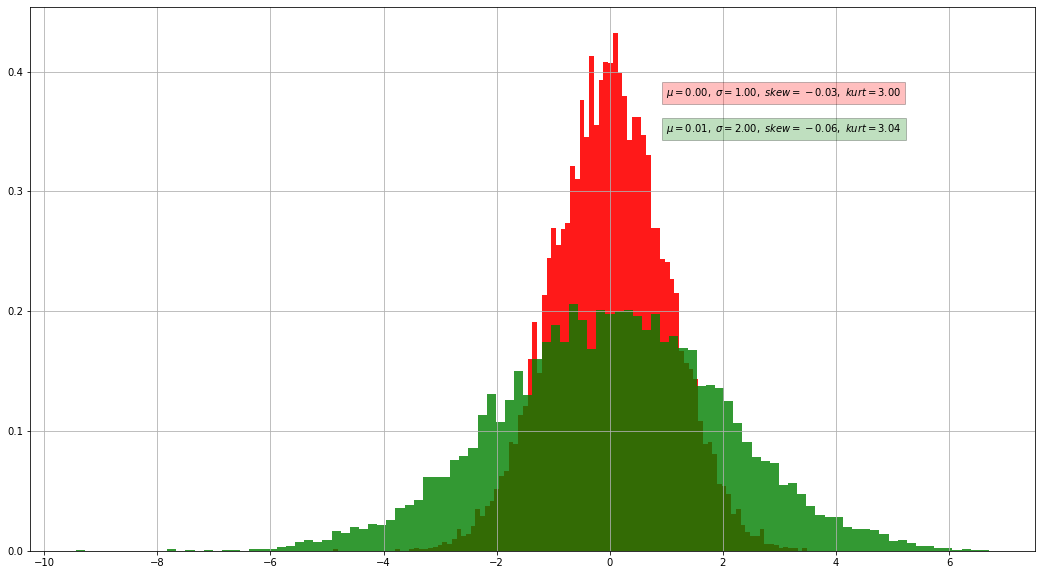

In [19]:
data =  list(np.random.randn(10000)) # 满足高斯分布的10000个数
data2 = list(2*np.random.randn(10000))  # 将满足好高斯分布的10000个数乘以两倍,方差变成四倍
[niu, sigma, skew, kurt] = calc_stat(data)
[niu_2, sigma2, skew2, kurt2] = calc_stat(data2)
print (niu, sigma, skew, kurt)
print (niu_2, sigma2, skew2, kurt2)
info = r'$\mu=%.2f,\ \sigma=%.2f,\ skew=%.2f,\ kurt=%.2f$' %(niu,sigma, skew, kurt) # 标注
info2 = r'$\mu=%.2f,\ \sigma=%.2f,\ skew=%.2f,\ kurt=%.2f$' %(niu_2,sigma2, skew2, kurt2)
plt.figure(figsize=(18,10))
plt.text(1,0.38,info,bbox=dict(facecolor='red',alpha=0.25))
plt.text(1,0.35,info2,bbox=dict(facecolor='green',alpha=0.25))
plt.hist(data,100,density=True,facecolor='r',alpha=0.9)
plt.hist(data2,100,density=True,facecolor='g',alpha=0.8)
plt.grid(True)
plt.show()

In [14]:
# pandas有封装好的函数
print(pd.Series(data).skew())
print(pd.Series(data).kurt())

0.007154385681148903
0.00824640561728085
